In [1]:
!pip install qiskit ipywidgets
!pip install pylatexenc

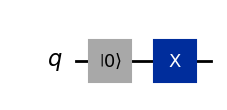

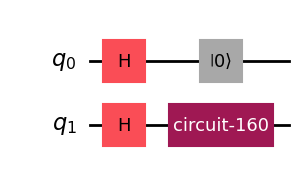

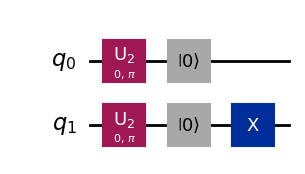

In [2]:
from qiskit import QuantumCircuit

reset_one_qc = QuantumCircuit(1)
reset_one_qc.reset(0)
reset_one_qc.x(0)
display(reset_one_qc.draw('mpl'))
reset_one_inst = reset_one_qc.to_instruction()

qc = QuantumCircuit(2)
qc.h(range(2))
qc.reset(0)
qc.append(reset_one_inst, [1])
display(qc.draw('mpl'))
qc.decompose().draw('mpl')

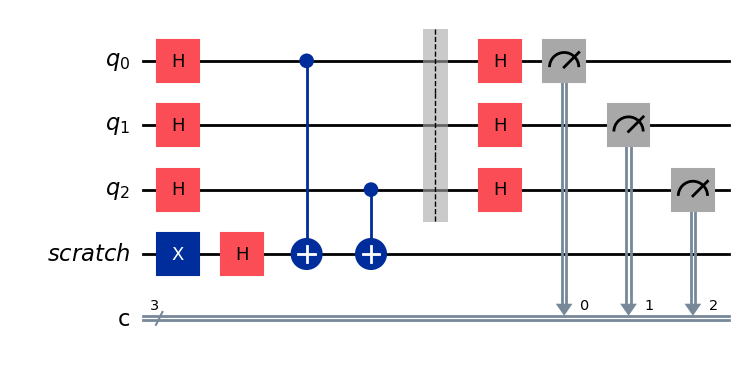

In [47]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(3, 'q')
scratch = QuantumRegister(1, 'scratch')
cr = ClassicalRegister(3, 'c')

qc = QuantumCircuit(qr, scratch, cr)

qc.h(qr)
qc.x(scratch)
qc.h(scratch)
qc.cx(qr[0], scratch)
qc.cx(qr[2], scratch)
qc.barrier(qr)
qc.h(qr)
qc.measure(qr, cr)
qc.draw('mpl')

In [49]:
from qiskit.circuit.library import CCXGate

toffoli = CCXGate()
print(toffoli.num_ctrl_qubits)

2


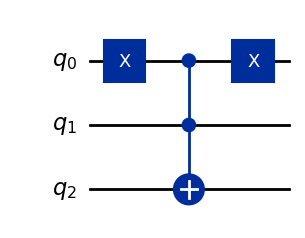

In [54]:
toffoli_mutable = toffoli.to_mutable()
toffoli_mutable.ctrl_state = 2
toffoli_mutable.definition.draw('mpl')

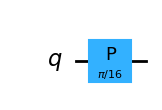

In [55]:
from math import pi

p16_qc = QuantumCircuit(1)
p16_qc.p(pi/16, 0)
p16_gate = p16_qc.to_gate()
p16_gate.definition.draw('mpl')

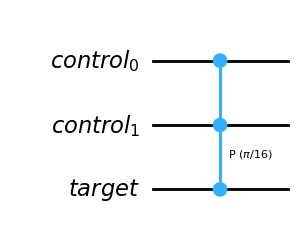

In [56]:
ctrl_p16 = p16_gate.control(2)
ctrl_p16.definition.draw('mpl')

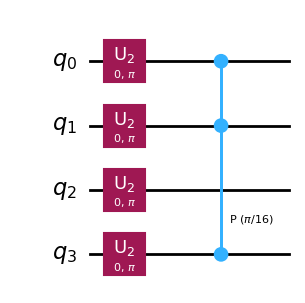

In [57]:
qc = QuantumCircuit(4)
qc.h(range(4))
qc.append(ctrl_p16, [0, 1, 3])

qc.decompose().draw('mpl')

In [59]:
from qiskit.circuit import ParameterVector
theta = ParameterVector('θ', 3)
print(theta)

θ, ['θ[0]', 'θ[1]', 'θ[2]']


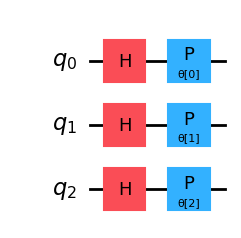

In [60]:
qc = QuantumCircuit(3)
qc.h(range(3))
for i in range(3):
  qc.p(theta[i], i)

qc.draw('mpl')

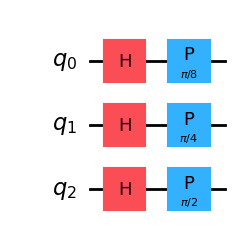

In [62]:
b_qc = qc.assign_parameters({theta: [
    pi/8,
    pi/4,
    pi/2
]})
b_qc.draw('mpl')

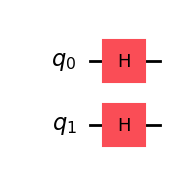

<IPython.core.display.Latex object>

In [63]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import latex

qc = QuantumCircuit(2)
qc.h(range(2))
display(qc.draw('mpl'))
state = Statevector.from_instruction(qc)
state.draw('latex')

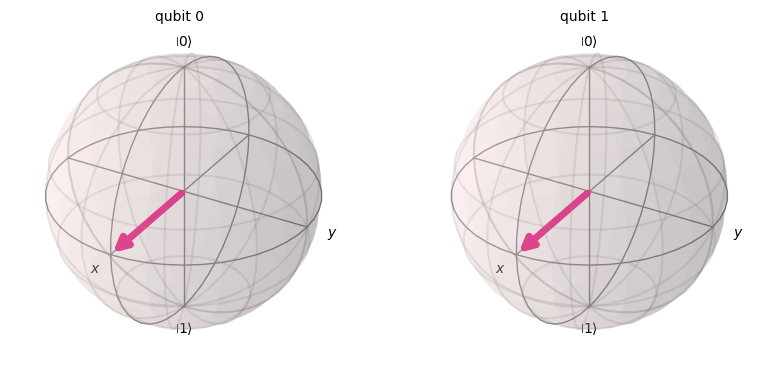

In [64]:
state.draw('bloch')

[0.25 0.25 0.25 0.25]
{'00': 267, '01': 261, '10': 244, '11': 252}


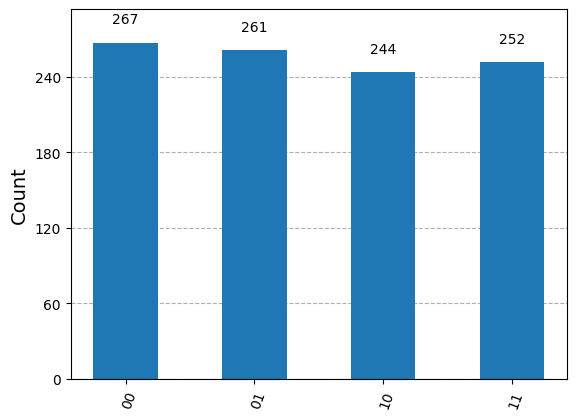

In [65]:
from qiskit.visualization import plot_histogram

probs = state.probabilities()
print(probs)

counts = state.sample_counts(shots=1024)
print(counts)

plot_histogram(counts)

In [66]:
samples = state.sample_memory(shots=10)
print(samples)

['11' '10' '00' '10' '01' '11' '01' '10' '10' '00']


In [67]:
import qiskit.quantum_info as qi

Operator = qi.SparsePauliOp(['ZZ', 'XX', 'II'], [0.2, -0.3, 0.4])

full_operator = Operator.to_operator()

full_operator.draw('latex')

<IPython.core.display.Latex object>

0.2⋅(Z⊗Z)+(−0.3)⋅(X⊗X)+0.4⋅(I⊗I)

For a pure state ∣𝜓⟩:<br />
⟨O⟩=⟨ψ∣O∣ψ⟩ <br />
<p>&nbsp;</p>
For a mixed state represented by a density matrix 𝜌: <br />
⟨O⟩=Tr(ρO)

In [68]:
expection_value = state.expectation_value(Operator)
print(expection_value)

(0.10000000000000003+0j)


In [69]:
rho = qi.DensityMatrix(qc)
rho.draw('latex')

<IPython.core.display.Latex object>

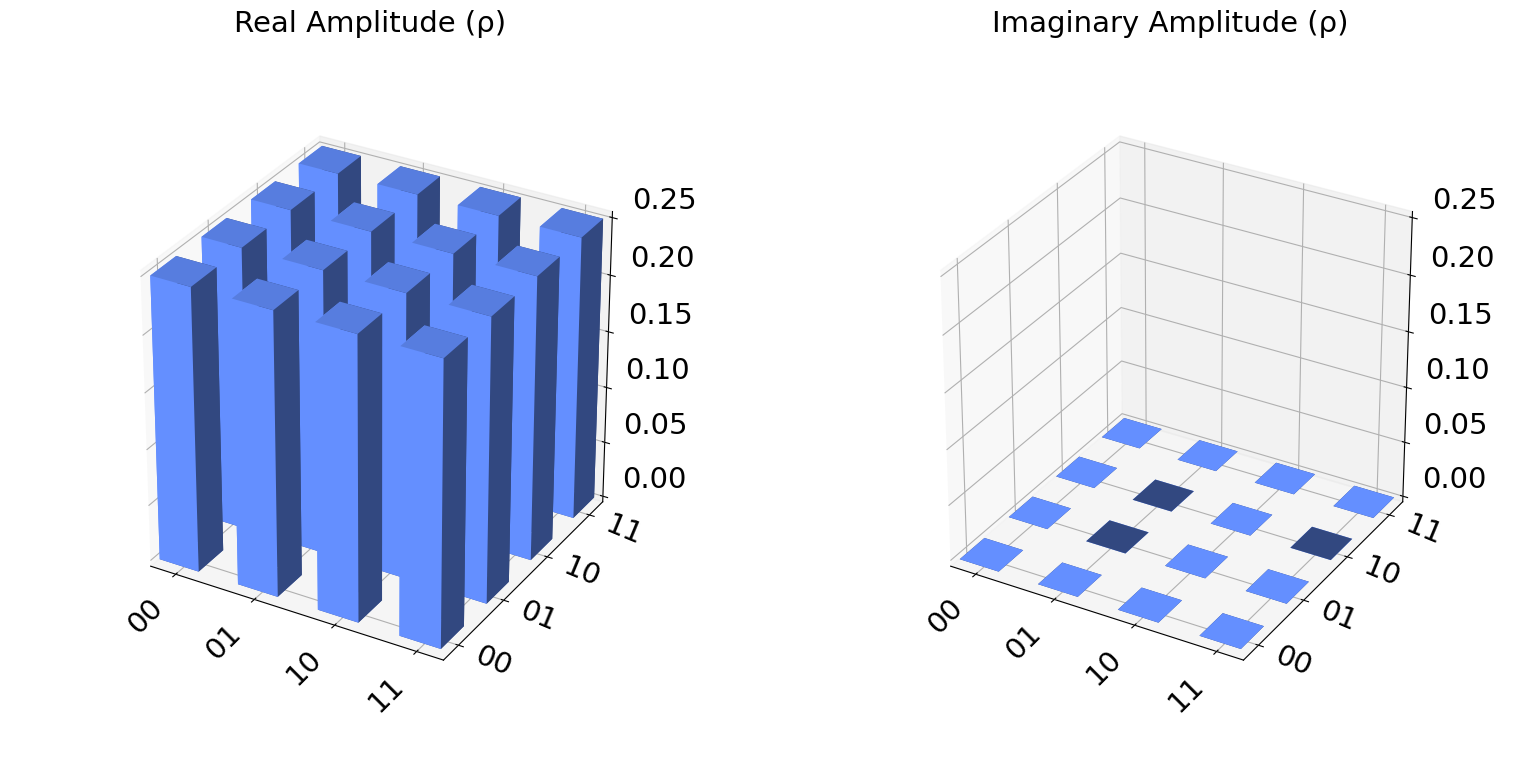

In [70]:
rho.draw('city')

$
ρ_B=Tr_A(ρ_{AB})
$

In [71]:
rho1 = qi.partial_trace(rho, [0])
rho1.draw('latex')

<IPython.core.display.Latex object>

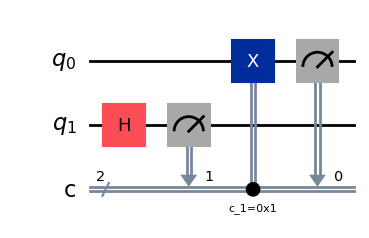

In [72]:
qc = QuantumCircuit(2, 2)

qc.h(1)
qc.measure(1, 1)
qc.x(0).c_if(1, 1)
qc.measure(0, 0)
display(qc.draw('mpl'))

In [73]:
qi.Statevector(qc)

QiskitError: 'Cannot apply instruction with classical bits: measure'

In [75]:
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()

job = simulator_basic.run(qc, shots=1024)
result = job.result()
print(result)

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='99f71838-fb1a-41e8-b1b2-99b3e5550c7c', job_id='4b5e2f05-c889-467b-a913-f26f0f117dc8', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 514, '0x0': 510}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1]], n_qubits=2, qreg_sizes=[['q', 2]], clbit_labels=[['c', 0], ['c', 1]], memory_slots=2, creg_sizes=[['c', 2]], name='circuit-233', global_phase=0.0, metadata={}), status=DONE, name='circuit-233', seed_simulator=1171263223, time_taken=0.20849895477294922)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.20852923393249512)


In [76]:
counts = result.get_counts()
print(counts)

{'11': 514, '00': 510}


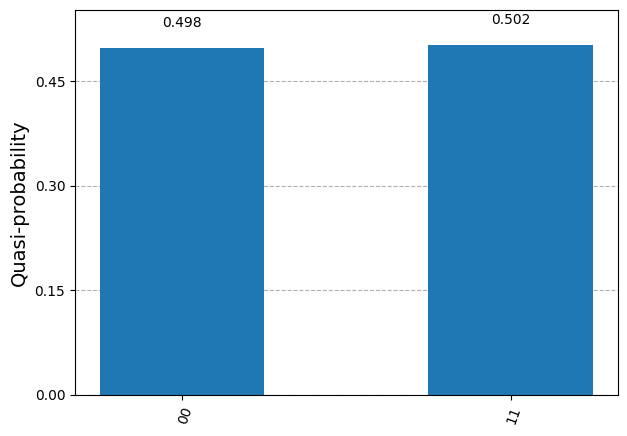

In [77]:
from qiskit.visualization import plot_distribution

plot_distribution(counts)

In [78]:
job = simulator_basic.run(qc, shots=10, memory=True)

result = job.result()
samples = result.get_memory()

print(samples)

['00', '00', '00', '00', '11', '11', '00', '11', '00', '11']


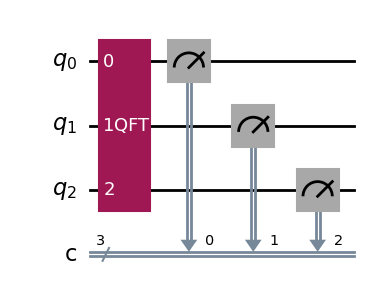

In [79]:
from qiskit.circuit.library import QFT

qc = QuantumCircuit(3, 3)
qc.append(QFT(3), range(3))
qc.measure(range(3), range(3))
qc.draw('mpl')

In [80]:
job = simulator_basic.run(qc, shots=1024)

BasicProviderError: 'basic_simulator encountered unrecognized operation "QFT"'

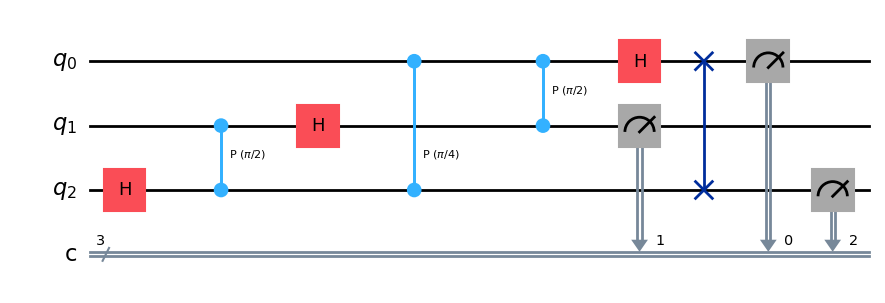

{'100': 155, '111': 123, '001': 139, '000': 127, '101': 121, '110': 116, '010': 132, '011': 111}


In [82]:
from qiskit import transpile

transpiled_qc = transpile(qc, backend=simulator_basic)
display(transpiled_qc.draw('mpl'))

job = simulator_basic.run(transpiled_qc, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

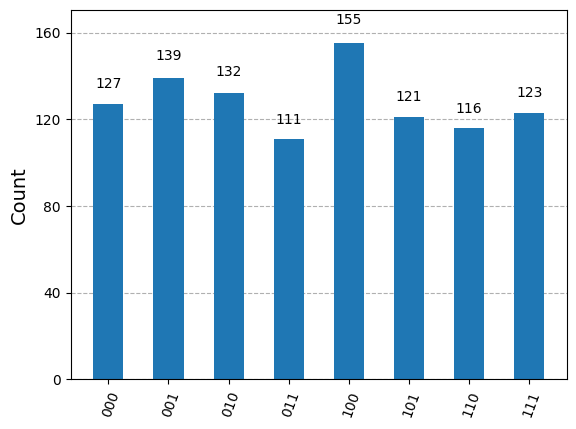

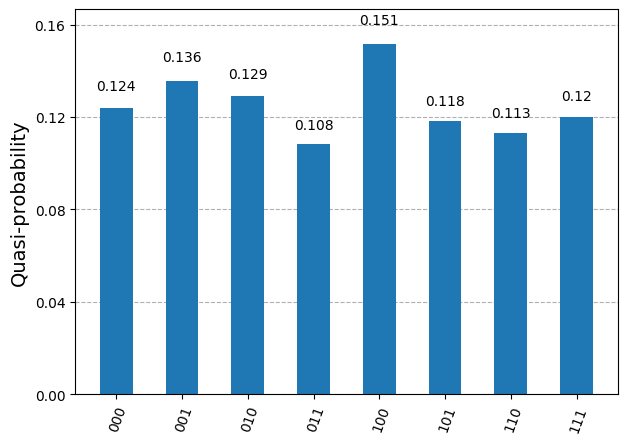

In [83]:
display(plot_histogram(counts))
display(plot_distribution(counts))

In [84]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.6 MB/s eta 0:00:00


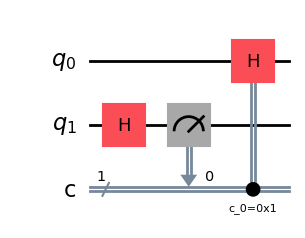

In [85]:
qc = QuantumCircuit(2, 1)
qc.h(1)
qc.measure(1, 0)
qc.h(0).c_if(0, 1)
qc.draw('mpl')

In [86]:
qc_basic = transpile(qc, backend=simulator_basic)
result = simulator_basic.run(qc_basic, shots=1024).result()
counts = result.get_counts()
print(counts)

{'1': 504, '0': 520}


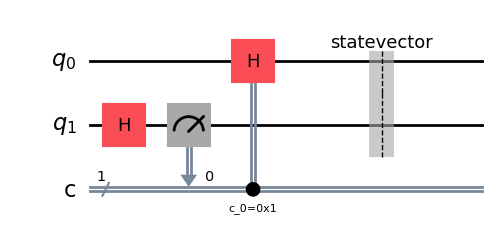

In [87]:
from qiskit_aer import AerSimulator
simulator_aer = AerSimulator()
qc = QuantumCircuit(2, 1)
qc.h(1)
qc.measure(1, 0)
qc.h(0).c_if(0, 1)
qc.save_statevector()
qc.draw('mpl')

In [90]:
for i in range(6):
  qc_aer = transpile(qc, backend=simulator_aer)
  result = simulator_aer.run(qc_aer).result()
  Psi = result.get_statevector()
  display(Psi.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [91]:
qc_basic = transpile(qc, backend=simulator_basic)
result = simulator_basic.run(qc_basic).result()
Psi = result.get_statevector()
Psi.draw('latex')

TranspilerError: "Unable to translate the operations in the circuit: ['measure', 'h', 'save_statevector'] to the backend's (or manually specified) target basis: ['ecr', 'csx', 'cp', 'delay', 'cx', 'r', 'swap', 'cswap', 'cz', 'rz', 's', 'rx', 'cu3', 'h', 'cs', 'sx', 'barrier', 'ccz', 'store', 'snapshot', 'ryy', 'u', 'rzx', 'u1', 'cy', 'ccx', 'xx_minus_yy', 'csdg', 'global_phase', 'id', 'cu', 'u3', 'p', 'cry', 'crz', 'xx_plus_yy', 'rccx', 'tdg', 'z', 'u2', 'ry', 'measure', 'dcx', 'unitary', 'sdg', 'ch', 'crx', 'rzz', 'sxdg', 'y', 'x', 't', 'iswap', 'reset', 'rxx', 'cu1']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.BasisTranslator#translation-errors"

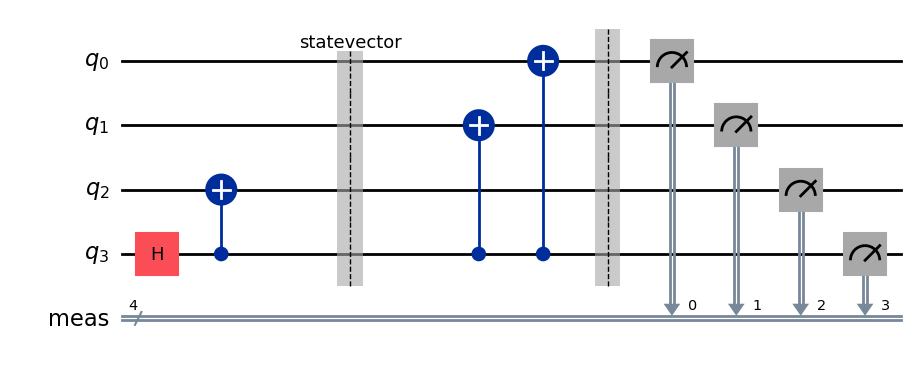

In [92]:
qc = QuantumCircuit(4)
qc.h(3)
qc.cx(3, 2)
qc.save_statevector()
qc.cx(3, 1)
qc.cx(3, 0)
qc.measure_all()
qc.draw('mpl')

In [93]:
qc_aer = transpile(qc, backend=simulator_aer)
result = simulator_aer.run(qc_aer).result()
Psi = result.get_statevector()
display(Psi.draw('latex'))

<IPython.core.display.Latex object>

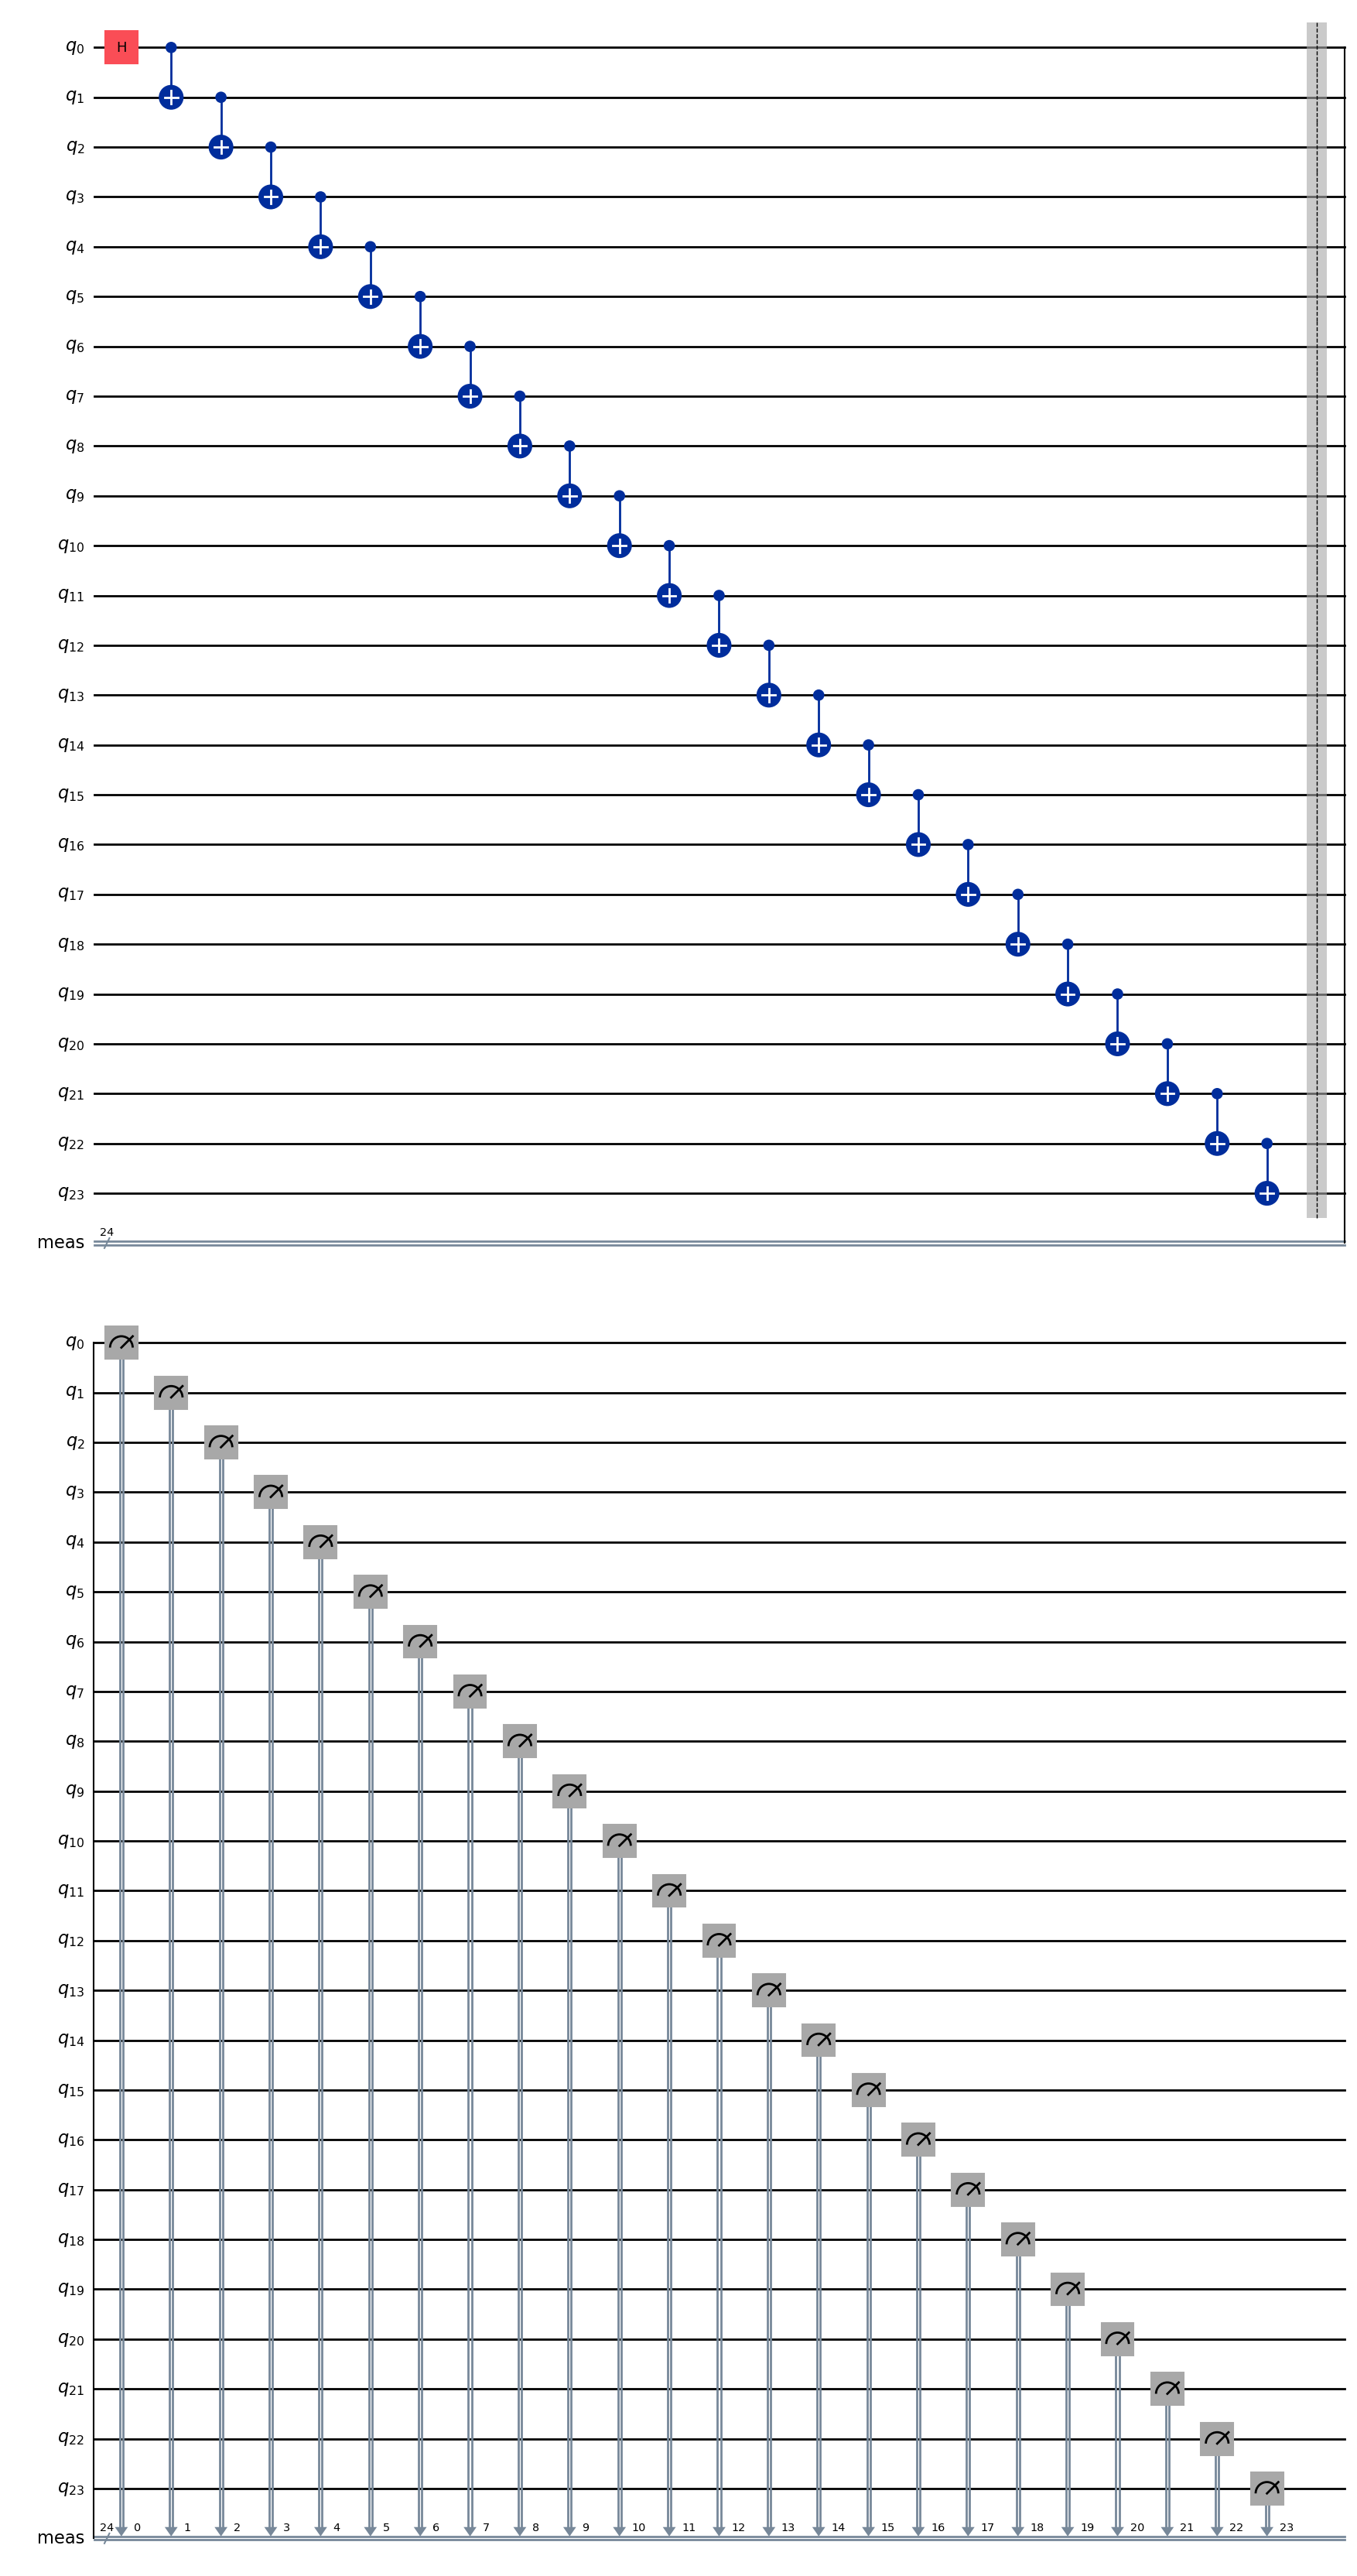

In [94]:
n = 24
qc = QuantumCircuit(n)
qc.h(0)
for i in range(n-1):
  qc.cx(i, i+1)

qc.measure_all()
qc.draw('mpl')

In [95]:
%%time
result = simulator_basic.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

{'111111111111111111111111': 515, '000000000000000000000000': 509}
CPU times: user 12.2 s, sys: 3.05 s, total: 15.2 s
Wall time: 15.3 s


In [97]:
%%time
result = simulator_aer.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

{'111111111111111111111111': 499, '000000000000000000000000': 525}
CPU times: user 30.4 ms, sys: 0 ns, total: 30.4 ms
Wall time: 25.9 ms


In [101]:
n = 25
qc = QuantumCircuit(n)
qc.h(0)
for i in range(n-1):
  qc.cx(i, i+1)

qc.measure_all()

In [102]:
%%time
result = simulator_basic.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)

BasicProviderError: 'Number of qubits 25 is greater than maximum (24) for "basic_simulator".'